<h1><div class="alert alert-block alert-info">
Time Series
</div></h1>

Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as autocorrelation, trend or seasonal variation) that should be accounted for.

<i>Source: https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm </i>

<h2>Patterns</h2>

We assume that the time series can present some patterns:
- seasonality
- trend
- cyclic: differs from seasonality in terms of not having a fix periodicity over time.

<img src="https://otexts.com/fpp2/fpp_files/figure-html/fourexamples-1.png">

Source: Forecasting Principles and Practice

<table>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0lax">Trend</th>
    <th class="tg-0lax">Seasonality</th>
    <th class="tg-0lax">Cyclic</th>
  </tr>
  <tr>
    <td class="tg-0lax">Sales of new one-family houses</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">Yes</td>
  </tr>
  <tr>
    <td class="tg-0lax">US treasury contracts</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">Yes</td>
  </tr>
  <tr>
    <td class="tg-0lax">Australian quarterly electricity production</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">Yes</td>
    <td class="tg-0lax">No</td>
  </tr>
  <tr>
    <td class="tg-0lax">Google daily changes in closing stock price</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">No</td>
    <td class="tg-0lax">No</td>
  </tr>
</table>

library(forecast)
library(ggplot2)

We are going to study the varicelle data set searching for three kinds of patterns in time series.

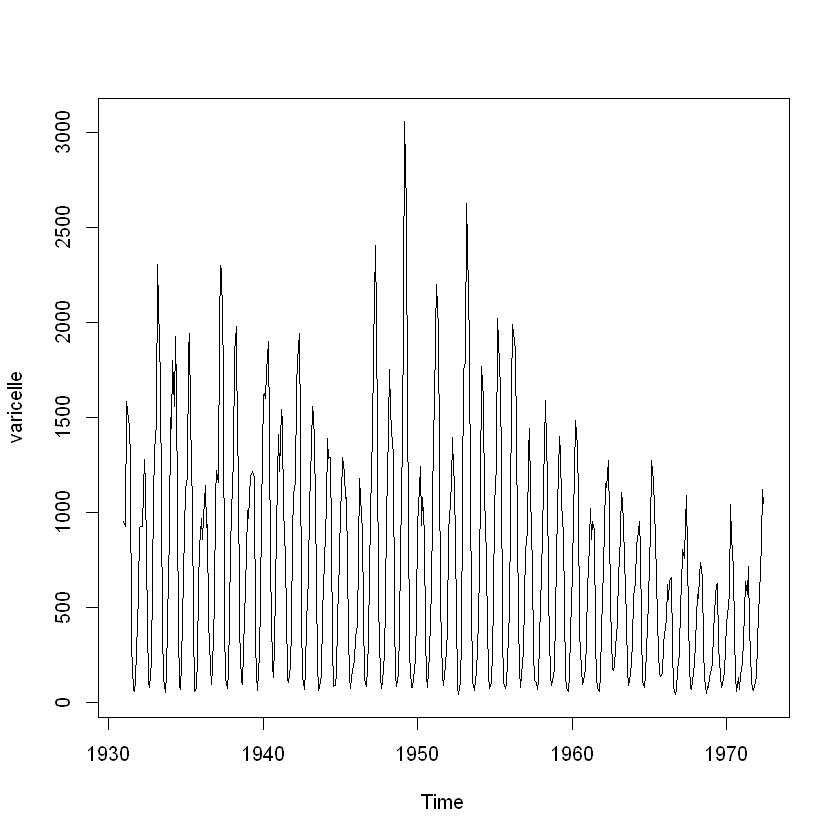

In [6]:
data = read.table(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/varicelle.csv", header = TRUE)
varicelle <- ts(data$x,start=c(1931,1),end=c(1972,6),freq=12)
plot(varicelle)

<h3>Seasonality</h3>

Seasonality is a pattern recurrent over time. In our case we can see that the higher incidence of varicelle has its peak in March.

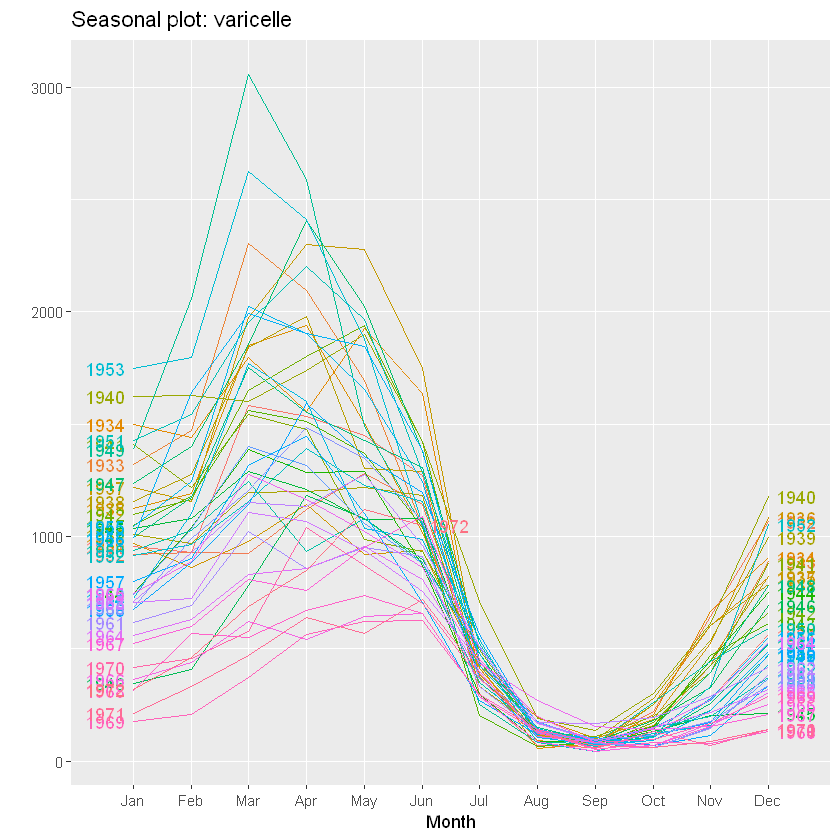

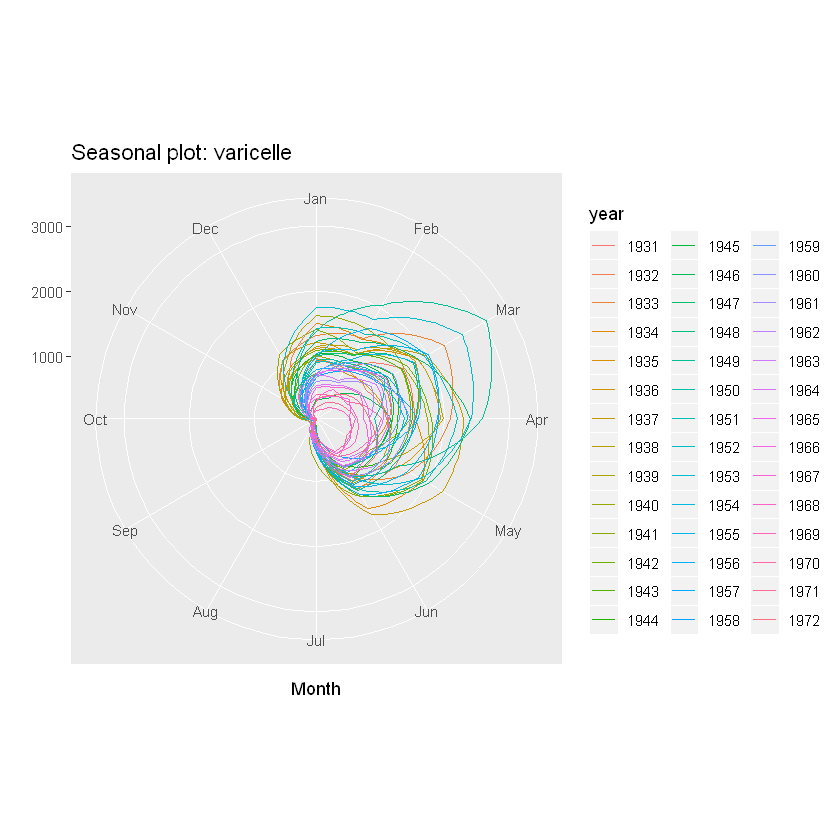

In [7]:
ggseasonplot(varicelle,year.labels= TRUE,year.labels.left=TRUE)
ggseasonplot(varicelle,polar=TRUE)

<h3>Trend</h3>

The trend shows the tendency of increasing or decreasing over time. In the varicelle dataset we see that between 1931 and 1957 there was no trend, but since then the number of cases is decreasing.

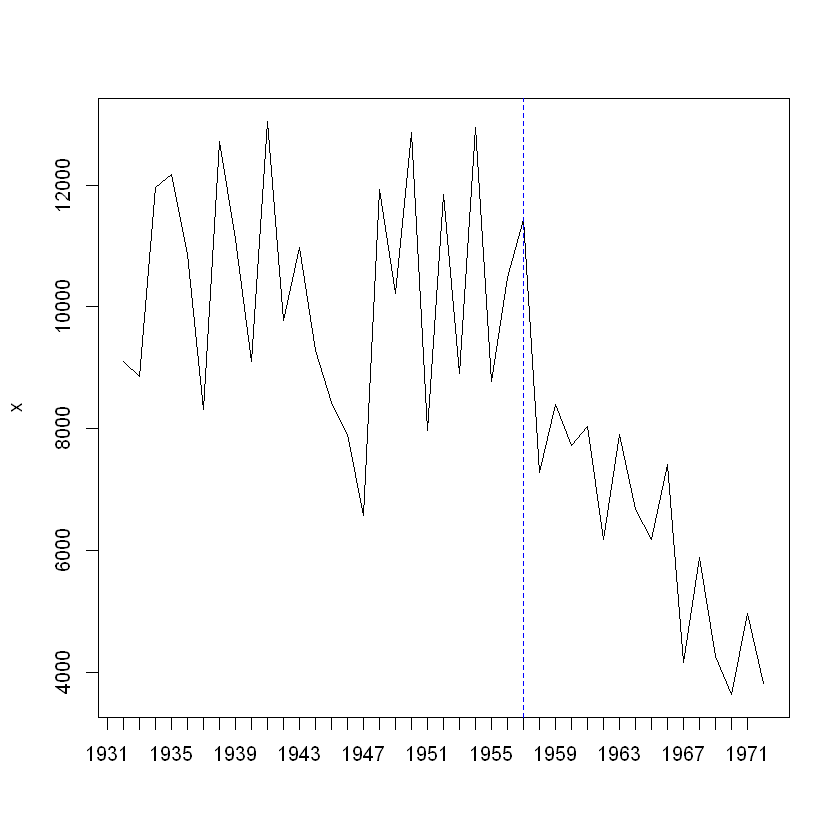

In [28]:
x=rep(0,41)
for (i in 0:40) x[i+1]<-sum(varicelle[(1+12*i):(12*(i+1))])
    plot(x,type='l',xaxt='n',xlab='')
    axis(1,at = 0:40,labels = 1931:1971)
abline(v=26, col="blue", lty=2)

<h3>Stationarity</h3>

Stationarity is observed in a time series if there are characteristics that do not depend on t.

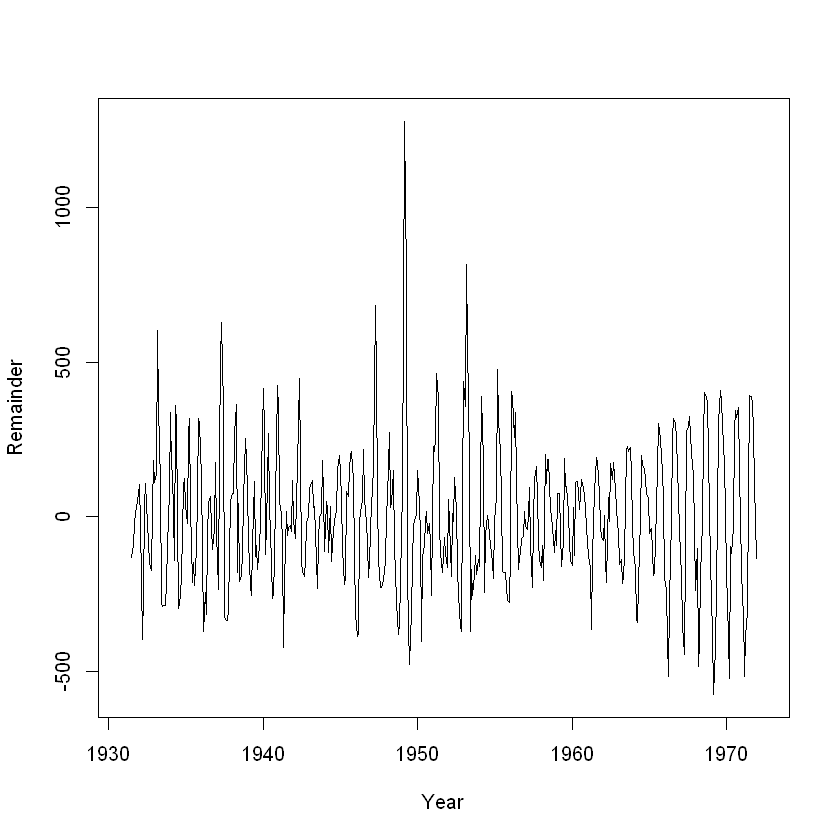

In [8]:
plot(decompose(varicelle,type="additive")$random, ylab='Remainder', xlab='Year')

<hr>
<h2>Descriptive statistics for time series</h2>

<font color = 'blue'><h3>Mean and Variance</h3></font>

$\bar x_n = \frac {1}{n} \sum_{t=1}^nx_t$ 

$\bar \sigma_n(0)=\frac {1}{n} \sum_{t=1}^n(x_t - \bar x_n)^2$

<font color = 'blue'><h3>Autocovariance</h3></font>

The autocovariance is a function that gives the covariance of the process with itself at pairs of time points.

$\sigma_n \hat(h) = \frac {1}{n-h} \sum_{t=1}^{n-h}(x_t-\bar {x_n})(x_{t+h}-\bar{x_n})$

<font color = 'blue'><h3>Autocorrelation (ACF)</h3></font>

Autocorrelation measures the linear relationship between lagged values of a time series.

$\hat \rho_n(h) = \frac {\hat \sigma_n(h)} {\sigma_n(0)}$

<font color = 'blue'><h3>Partial Autocorrelation (PACF)</h3></font>

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

Given a time series ${\displaystyle z_{t}}z_{t}$, the partial autocorrelation of lag k, denoted ${\displaystyle \alpha (k)}\alpha(k)$, is the autocorrelation between ${\displaystyle z_{t}}z_{t}$ and ${\displaystyle z_{t+k}}z_{{t+k}}$ with the linear dependence of ${\displaystyle z_{t}}z_{t}$ on ${\displaystyle z_{t+1}}z_{{t+1}}$ through ${\displaystyle z_{t+k-1}}z_{{t+k-1}}$ removed; equivalently, it is the autocorrelation between ${\displaystyle z_{t}}z_{t}$ and ${\displaystyle z_{t+k}}z_{{t+k}}$ that is not accounted for by lags ${\displaystyle 1}1$ through ${\displaystyle k-1}k-1$, inclusive.

${\displaystyle \alpha (1)=\operatorname {corr} (z_{t+1},z_{t}),{\text{ for }}k=1,}$

${\displaystyle \alpha (k)=\operatorname {corr} (z_{t+k}-P_{t,k}(z_{t+k}),\,z_{t}-P_{t,k}(z_{t})),{\text{ for }}k\geq 2,}$

💡 It helps to find the number of periods that you need to use to predict values of your time series.

#### Linear trend

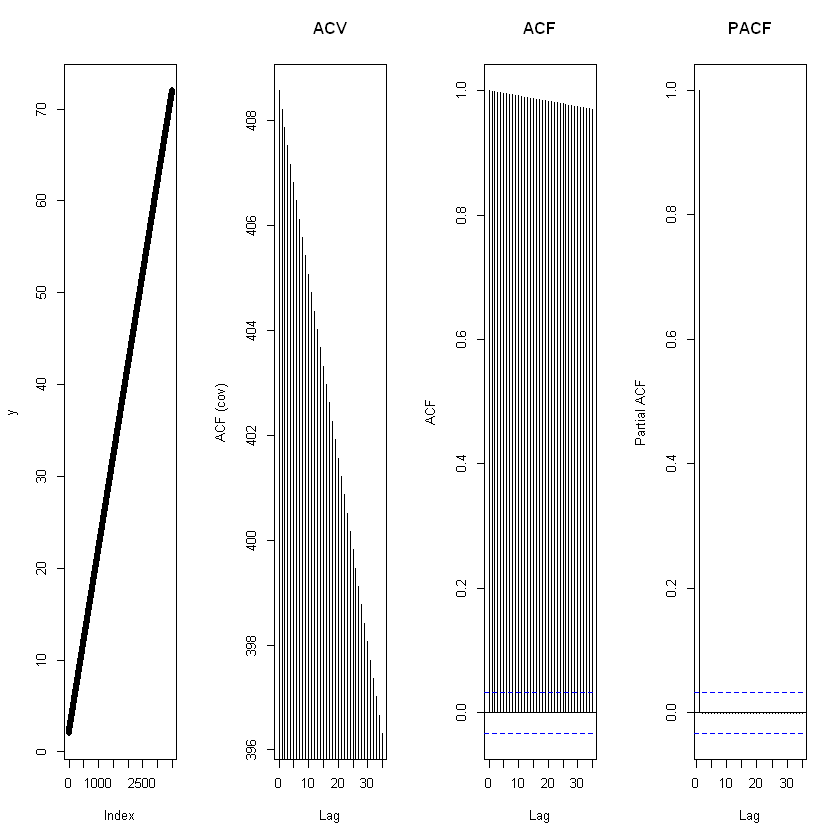

In [233]:
x = seq(1, 36, by=.01)
y = 2*x
par(mfrow=c(1,4))
plot(y)
acf(y, type="cov", plot = TRUE, main = "ACV")
acf(y, type="cor", plot = TRUE, main = "ACF")
pacf(y, plot = TRUE, main = "PACF")

💡 <b>Property 1) </b>if the time serie is a purely a linear trend $x_t = at + b$, then for all h: $\hat \rho_n(h) \xrightarrow[n \rightarrow \infty]{}1$, what in plain English means that our PACF will start at 1 and present a linear decresase because at each step we reduce the number of observations for the computation. 

#### Stationary

In [281]:
x = seq(1, 36, by=0.01)
y = ts(sin(x), frequency=365)

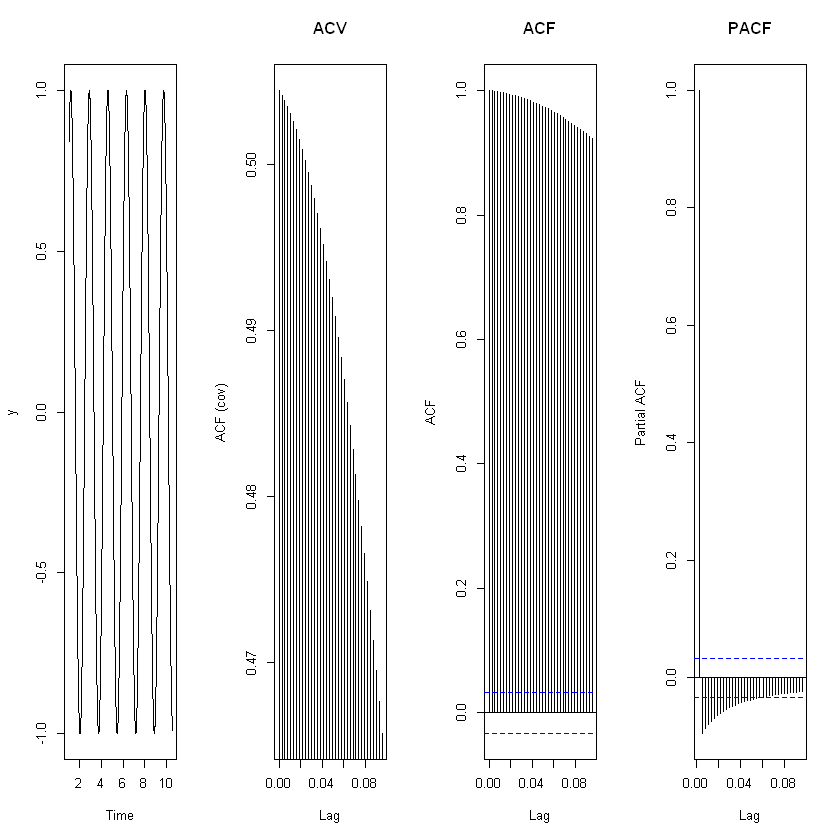

In [282]:
par(mfrow=c(1,4))
plot(y)
acf(y, type="cov", plot = TRUE, main = "ACV")
acf(y, type="cor", plot = TRUE, main = "ACF")
pacf(y, plot = TRUE, main = "PACF")

#### Changing mean

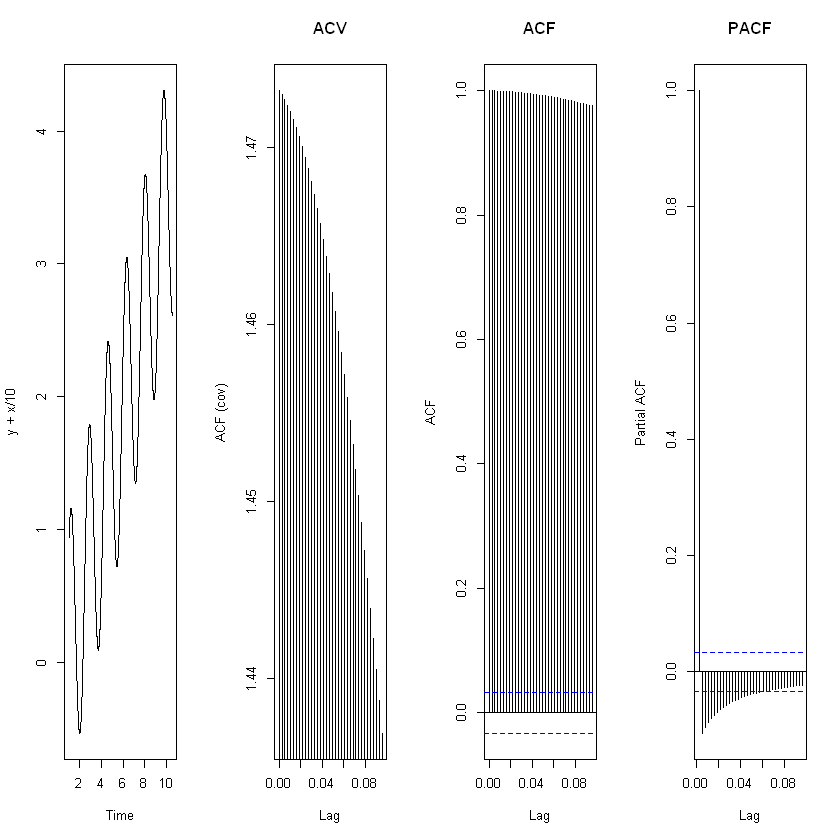

In [283]:
par(mfrow=c(1,4))
plot(y+x/10)
acf(y+x/10, type="cov", plot = TRUE, main = "ACV")
acf(y+x/10, type="cor", plot = TRUE, main = "ACF")
pacf(y+x/10, plot = TRUE, main = "PACF")

#### Changing variance

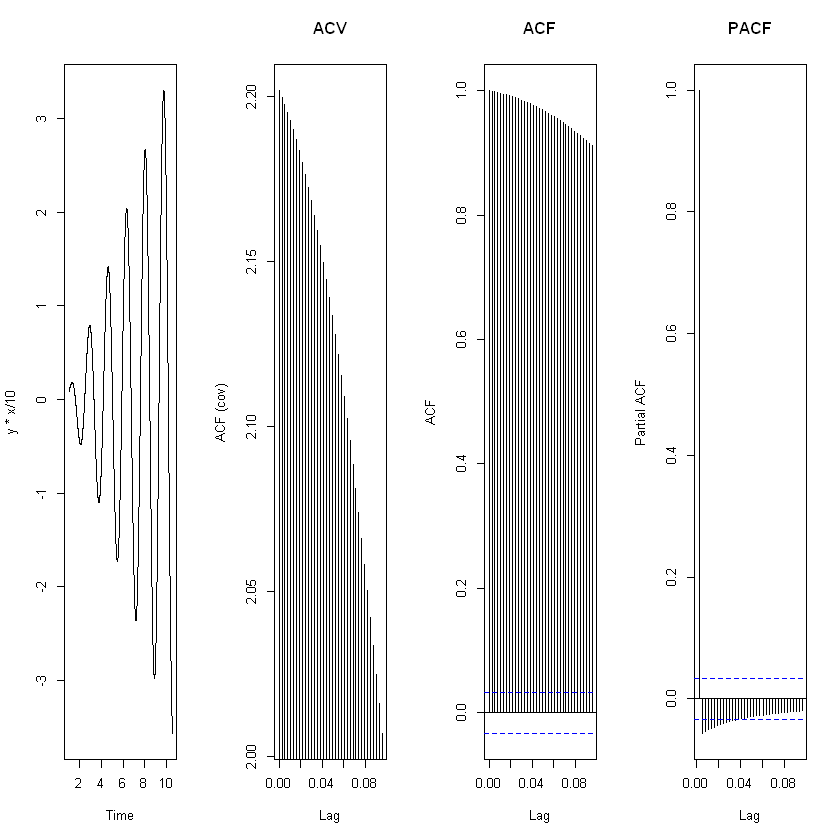

In [284]:
par(mfrow=c(1,4))
plot(y*x/10)
acf(y*x/10, type="cov", plot = TRUE, main = "ACV")
acf(y*x/10, type="cor", plot = TRUE, main = "ACF")
pacf(y*x/10, plot = TRUE, main = "PACF")

#### Changing covariance

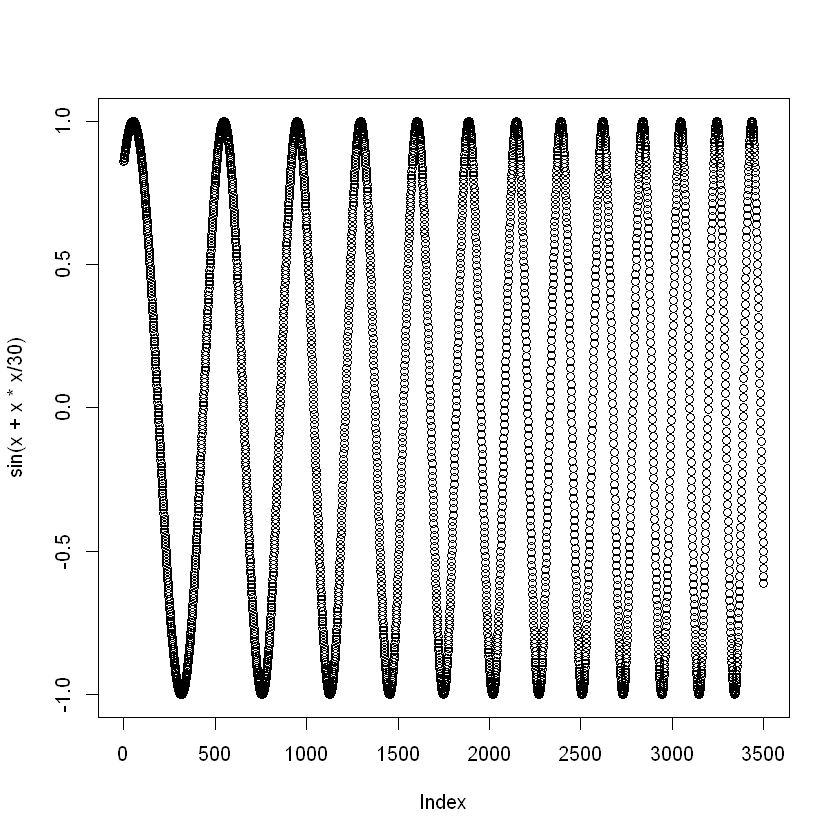

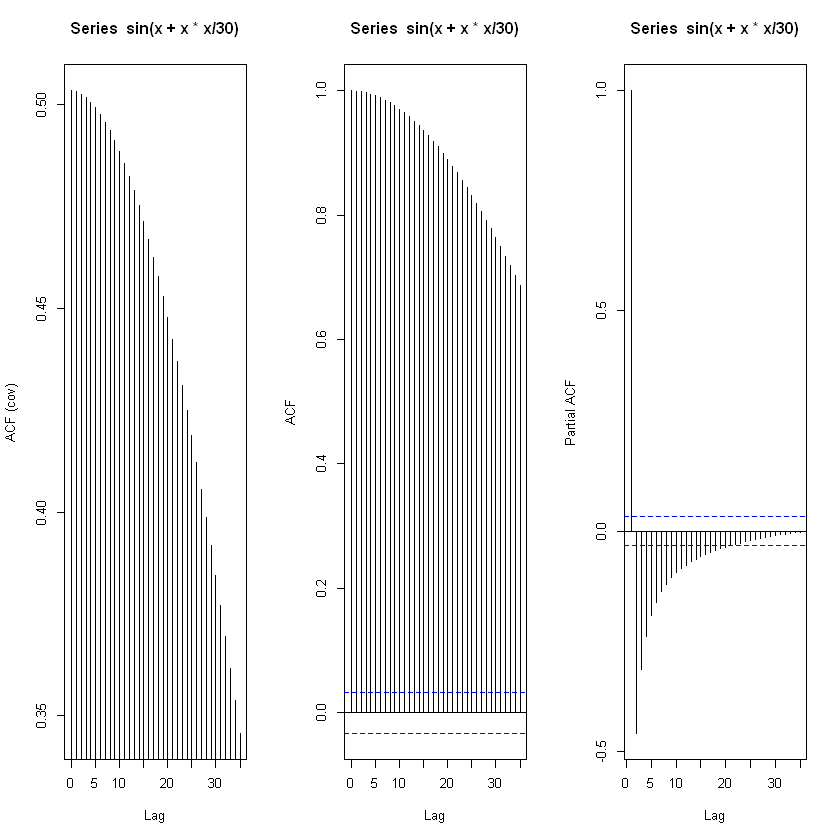

In [287]:
plot(sin(x+x*x/30))
par(mfrow=c(1,3))
acf(sin(x+x*x/30), type="cov", plot = TRUE)
acf(sin(x+x*x/30), type="cor", plot = TRUE)
pacf(sin(x+x*x/30), plot = TRUE)

#### Varicelle

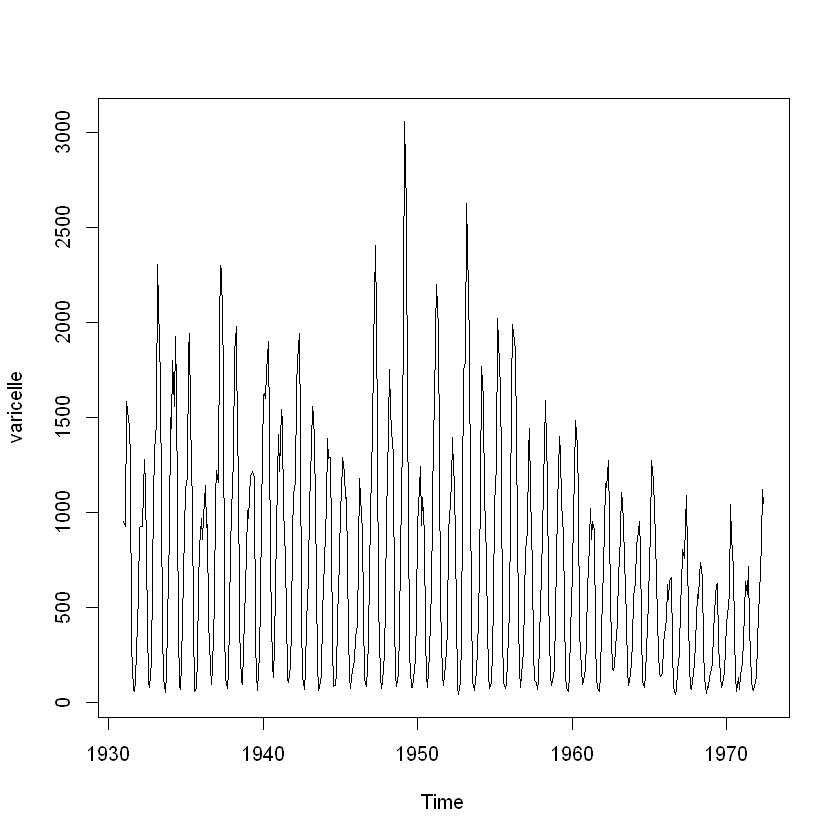

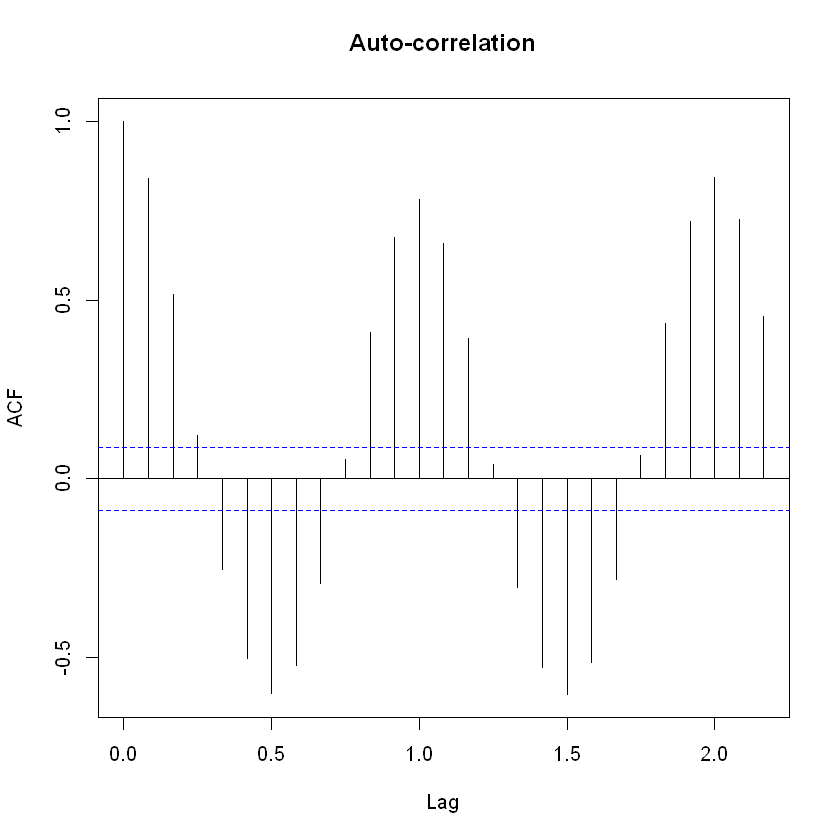

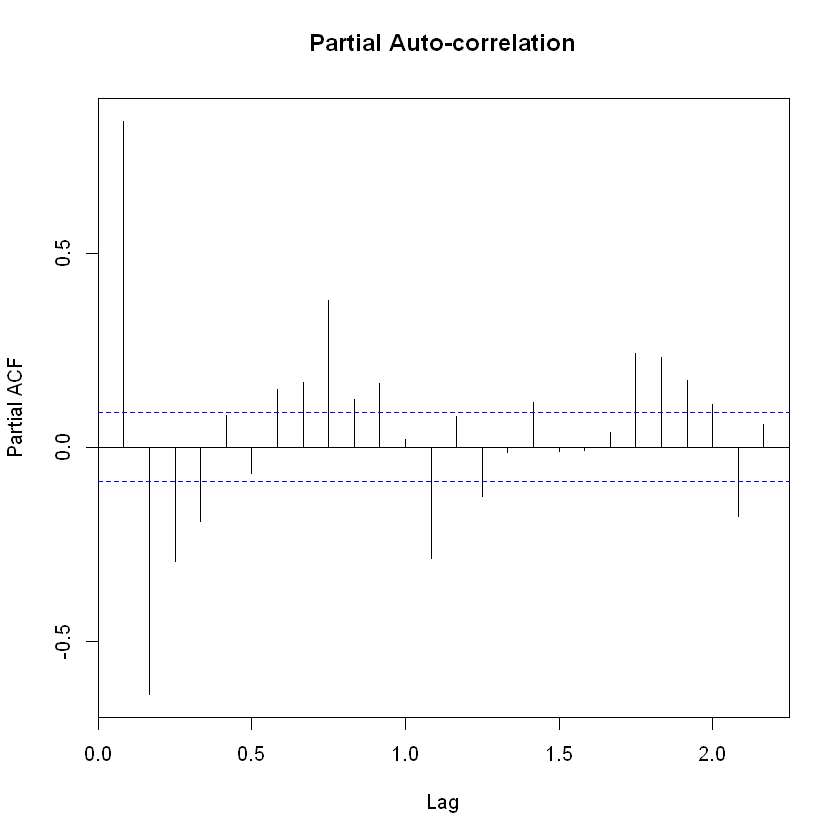

In [246]:
plot(varicelle)
acf(varicelle, type="cor", plot = TRUE, main = 'Auto-correlation')
pacf(varicelle, plot = TRUE, main = 'Partial Auto-correlation')

💡 <b>Property 2) </b>if the time serie is purely a seasonal pattern $x_t = a*cos(\frac{2\pi t}{T})$, then for all h: $\hat \rho_n(h) \xrightarrow[n \rightarrow \infty]{}cos(\frac{2\pi h}{T})$, what in plain English means that our PACF will have repetition on the frequency of the sazonality

#### GDP

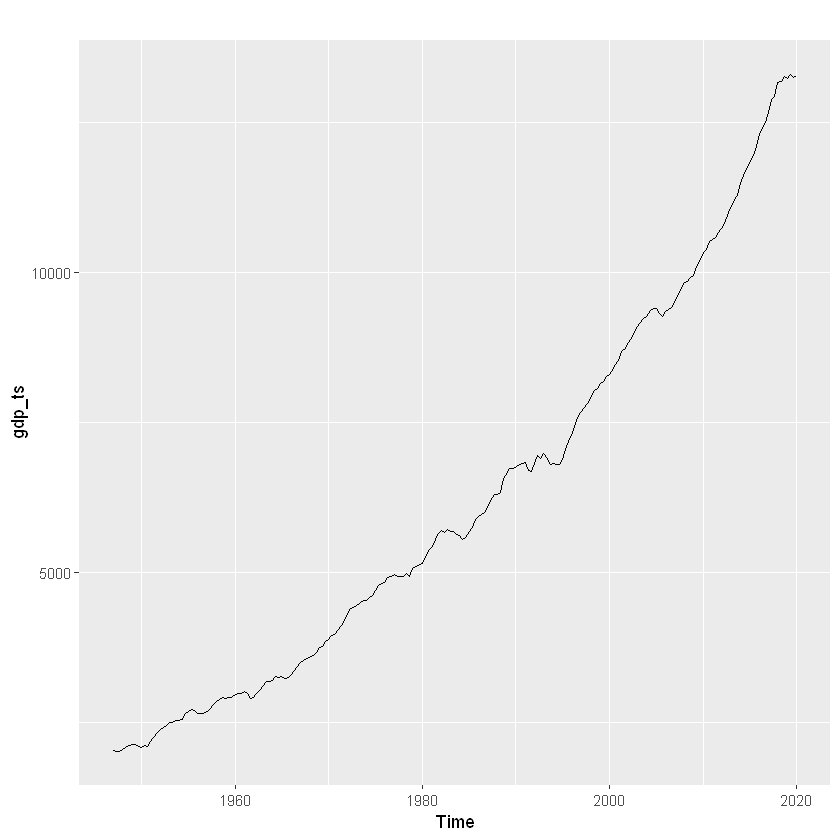

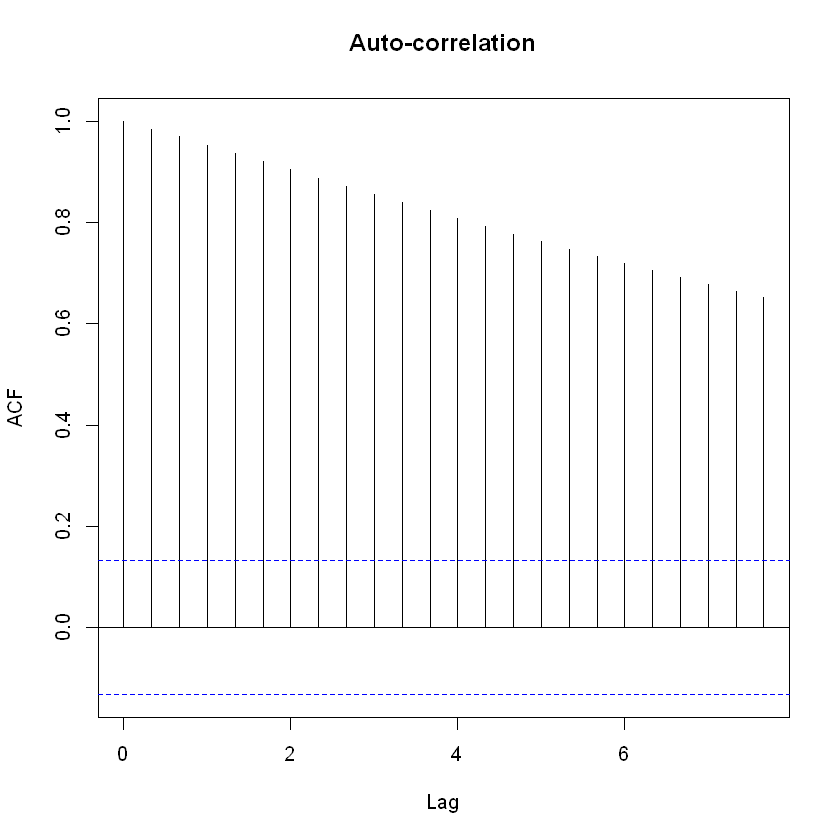

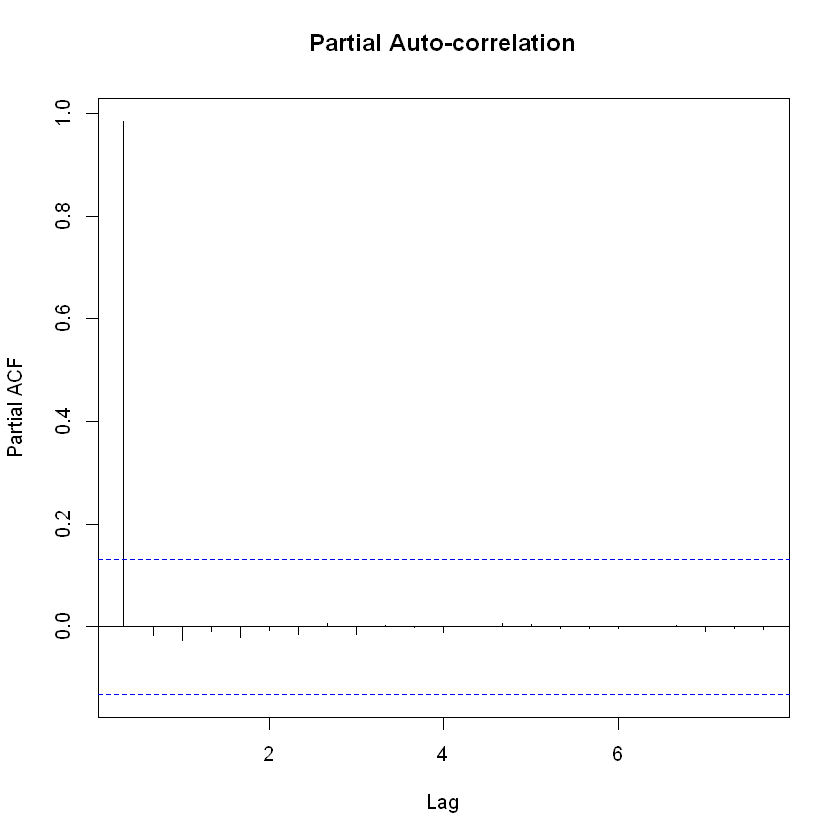

In [188]:
gdp = read.csv('../Timeseries-master/data/gdp.csv', sep = ',', header = TRUE)
gdp_ts = ts(gdp$GDP, start = c(1947,1), end = c(2019,4), freq = 3)
autoplot(gdp_ts)
acf(gdp_ts, type="cor", plot = TRUE, main = 'Auto-correlation')
pacf(gdp_ts, plot = TRUE, main = 'Partial Auto-correlation')

#### Airlines

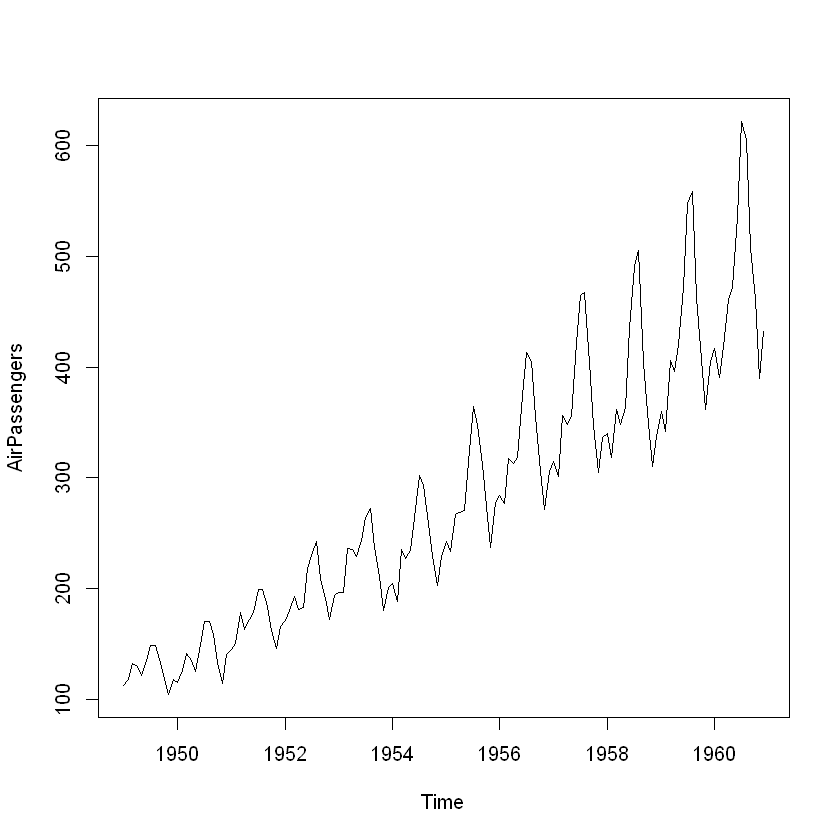

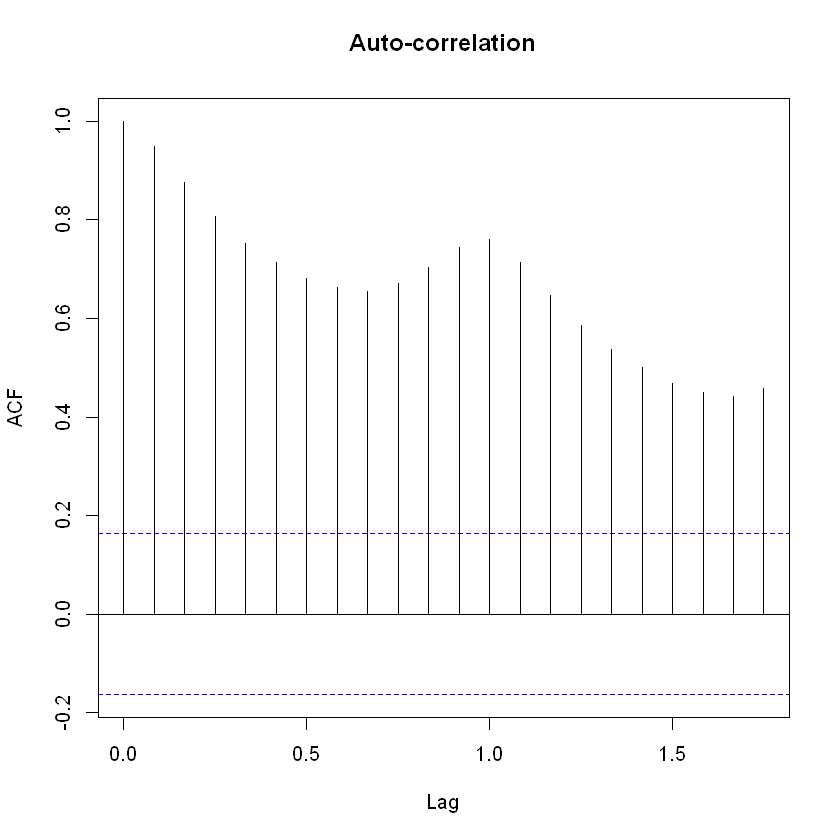

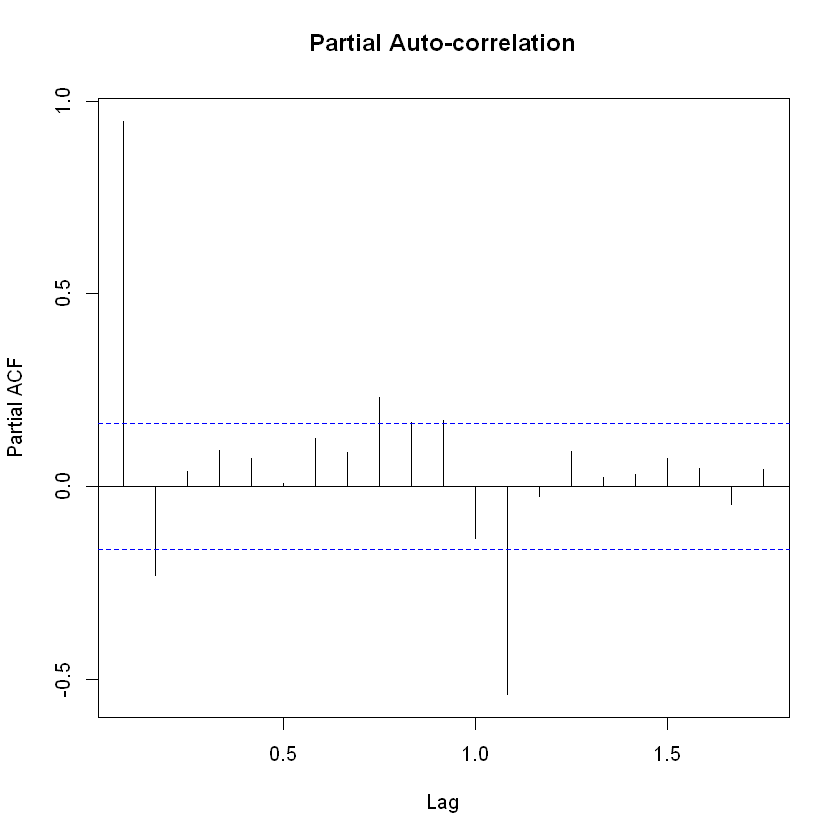

In [189]:
plot(AirPassengers)
acf(AirPassengers, type="cor", plot = TRUE, main = 'Auto-correlation')
pacf(AirPassengers, plot = TRUE, main = 'Partial Auto-correlation')